In [6]:
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import norm, chi2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

def CsI_part(t, tau, QR):            #funzione di fit per bgo e forse viene con csi, fit solo della discesa
    return QR/tau*(np.exp((-t)/tau)) 

ro1=0.64
ro2=0.36

def CsI_wheight_part(t,t0, tau1, tau2, QR):                                        #funzione di fit per csi come dicono in sipm2324, fit solo della discesa
    return QR/(ro1*tau1+ro2*tau2)*(ro1*np.exp((-t+t0)/tau1)+ro2*np.exp((-t+t0)/tau2))




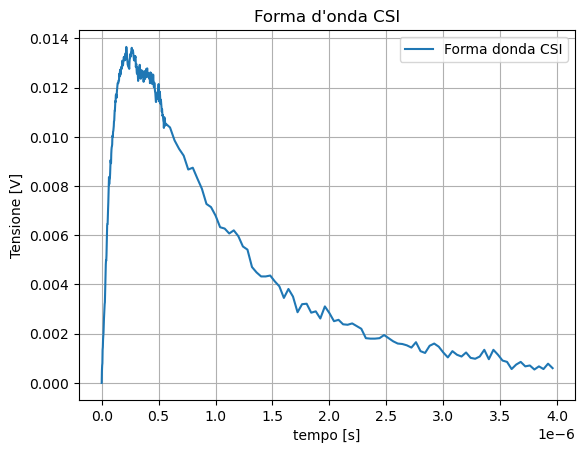

In [7]:
#FIT FORMA D'ONDA CSI

data = pd.read_csv('Forma-CSI.csv', delimiter=',')
data1= pd.read_csv('CSI-Salita.csv', delimiter=',')
data2= pd.read_csv('CSI-Discesa.csv', delimiter=',')


times=np.array(data1['Time']+5e-08)
timed=np.array(data2['Time']+5e-08)[::20]
volts = np.array(data1['Voltage']-0.0004363636363636363)
voltd = np.array(data2['Voltage']-0.0004363636363636363)[::20]
time = np.concatenate((times,timed))    
volt = np.concatenate((volts,voltd))

#smoothing della forma d'onda

#err sist sensibilità oscilloscopio
err_volt_s = np.array(data1['error'])
err_volt_d = np.array(data2['error'])[::20]
err_volt = np.sqrt((np.concatenate((err_volt_s,err_volt_d))/np.sqrt(6))**2+ 0.00012**2)

plt.plot(time, volt, label='Forma donda CSI')
plt.xlabel('tempo [s]')
plt.ylabel('Tensione [V]')
plt.title('Forma d\'onda CSI') 
plt.legend()
plt.grid()
plt.show()

In [8]:
def repeat_fit(ls, left_bound, right_bound, t0, tau1,tau2, QR, larghezza_minima1, larghezza_minima2, dis=False, limit_Time=1e-6):
    '''
    ampiezza picco limite = è la ampiezza dell'intorno di tau in cui è accettabile avere il picco
    '''
    t0_list = []
    error_t0_list = []
    tau1_list = []
    error_tau1_list = []
    tau2_list = []
    error_tau2_list = []
    QR_list = []
    error_QR_list = []
    for delta_Time in np.arange(0, abs(right_bound-left_bound)/2+limit_Time, 0.01e-6):
        ls.mask = (time > left_bound+delta_Time) & (time < right_bound-delta_Time)
        m = Minuit(ls,t0=t0, tau1=tau1, tau2=tau2, QR=QR)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['tau1'] < (tau1+larghezza_minima1/2) and m.values['tau1'] > (tau1-larghezza_minima1/2):    
                if m.values['tau2'] < (tau2+larghezza_minima2/2) and m.values['tau2'] > (tau2-larghezza_minima2/2):    
                    tau1_list.append(m.values['tau1'])
                    error_tau1_list.append(m.errors['tau1'])
                    QR_list.append(m.values['QR'])
                    error_QR_list.append(m.errors['QR'])
                    tau2_list.append(m.values['tau2'])
                    error_tau2_list.append(m.errors['tau2'])
                    t0_list.append(m.values['t0'])
                    error_t0_list.append(m.errors['t0'])
                    if dis==True: display(m)
        ls.mask = None
    for delta_Time in np.arange(0, abs(right_bound-left_bound)/2+limit_Time, 0.01e-6):
        ls.mask = (time > left_bound+delta_Time) & (time < right_bound-delta_Time/2)
        m = Minuit(ls,t0=t0, tau1=tau1, tau2=tau2, QR=QR)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['tau1'] < (tau1+larghezza_minima1/2) and m.values['tau1'] > (tau1-larghezza_minima1/2):  
                if m.values['tau2'] < (tau2+larghezza_minima2/2) and m.values['tau2'] > (tau2-larghezza_minima2/2):  
                    tau1_list.append(m.values['tau1'])
                    error_tau1_list.append(m.errors['tau1'])
                    tau2_list.append(m.values['tau2'])
                    error_tau2_list.append(m.errors['tau2'])
                    QR_list.append(m.values['QR'])
                    error_QR_list.append(m.errors['QR'])
                    t0_list.append(m.values['t0'])
                    error_t0_list.append(m.errors['t0'])
                    if dis==True: display(m)
        ls.mask = None
    for delta_Time in np.arange(0, abs(right_bound-left_bound)/2+limit_Time, 0.01e-6):
        ls.mask = (time > left_bound+delta_Time/2) & (time < right_bound-delta_Time)
        m = Minuit(ls,t0=t0, tau1=tau1, tau2=tau2, QR=QR)
        m.migrad()
        m.hesse()
        p_value = (1. - chi2.cdf (m.fval, df = m.ndof))
        if p_value > 0.05 and m.valid == True:
            if m.values['tau1'] < (tau1+larghezza_minima1/2) and m.values['tau1'] > (tau1-larghezza_minima1/2):    
                if m.values['tau2'] < (tau2+larghezza_minima2/2) and m.values['tau2'] > (tau2-larghezza_minima2/2):    
                    tau1_list.append(m.values['tau1'])
                    error_tau1_list.append(m.errors['tau1'])
                    tau2_list.append(m.values['tau2'])
                    error_tau2_list.append(m.errors['tau2'])
                    QR_list.append(m.values['QR'])
                    error_QR_list.append(m.errors['QR'])
                    t0_list.append(m.values['t0'])
                    error_t0_list.append(m.errors['t0'])
                    if dis==True: display(m)
        ls.mask = None
    return np.array(tau1_list), np.array(error_tau1_list), np.array(tau2_list), np.array(error_tau2_list), np.array(QR_list), np.array(error_QR_list), np.array(t0_list), np.array(error_t0_list)   

C:\Users\aless\AppData\Local\Temp\ipykernel_15308\3542568987.py:15: RuntimeWarning: overflow encountered in exp
  return QR/(ro1*tau1+ro2*tau2)*(ro1*np.exp((-t+t0)/tau1)+ro2*np.exp((-t+t0)/tau2))
C:\Users\aless\AppData\Local\Temp\ipykernel_15308\3542568987.py:15: RuntimeWarning: overflow encountered in multiply
  return QR/(ro1*tau1+ro2*tau2)*(ro1*np.exp((-t+t0)/tau1)+ro2*np.exp((-t+t0)/tau2))


tau1: [7.35797658e-07 7.35797658e-07 7.35797658e-07 7.40184263e-07
 6.86905172e-07 6.86905172e-07 6.86905172e-07 6.86905172e-07
 7.20120105e-07 7.20120105e-07] +- [2.82414611e-07 2.82414611e-07 2.82414611e-07 2.46554879e-07
 4.32825882e-07 4.32825882e-07 4.32825882e-07 4.32825882e-07
 5.55417648e-08 5.55417648e-08]
tau2: [2.81727271e-06 2.81727271e-06 2.81727271e-06 2.88014833e-06
 3.31233154e-06 3.31233154e-06 3.31233154e-06 3.31233154e-06
 3.05542932e-06 3.05542932e-06] +- [3.60547962e-06 3.60547962e-06 3.60547962e-06 3.26194196e-06
 7.68259416e-06 7.68259416e-06 7.68259416e-06 7.68259416e-06
 6.65381736e-07 6.65381736e-07]
QR: [6.97104195e-09 6.97104195e-09 6.97104195e-09 6.85637595e-09
 7.50804197e-09 7.50804197e-09 7.50804197e-09 7.50804197e-09
 7.07979988e-09 7.07979988e-09] +- [7.25127961e-09 7.25127961e-09 7.25127961e-09 5.93888503e-09
 5.64421451e-09 5.64421451e-09 5.64421451e-09 5.64421451e-09
 8.97909623e-10 8.97909623e-10]
tau: 7.20411033033378e-07 +- 2.6639545381111062e-08

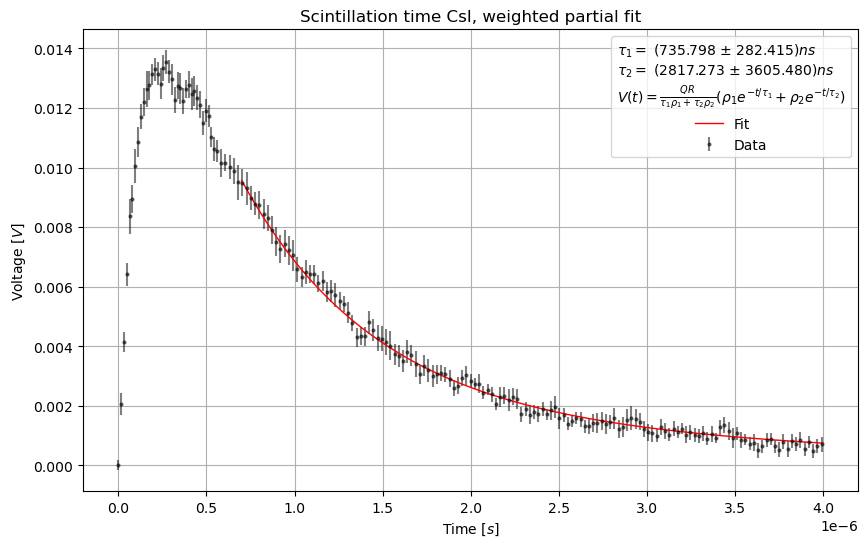

In [ ]:
# fit CsI pesato parziale

ls = LeastSquares(time, volt, err_volt, CsI_wheight_part)

#maschere
t_low=0.7e-6
t_up=3.9e-6
tau1_list, error_tau1_list, tau2_list, error_tau2_list, QR_list, err_QR_list, t0_list, err_t0_list = repeat_fit(ls, t_low, t_up, t0=0.000001, tau1=0.7e-6, tau2=3e-6, QR=10000, larghezza_minima1=0.1e-6, larghezza_minima2=0.8e-6,dis=False)

print(f"tau1: {tau1_list} +- {error_tau1_list}")
print(f"tau2: {tau2_list} +- {error_tau2_list}")
print(f"QR: {QR_list} +- {err_QR_list}")

def weighted_mean(values, errors):
    mean = np.sum(values/(errors**2))/np.sum(1/(errors**2))
    error_mean = abs(np.max(values) - np.min(values))/2 # errore sistematico dovuto alla scelta del range di interpolazione.
    # non è errore statistico perchè non è dato dalla ripetizione della misura
    return mean, error_mean

tau1_mean, tau1_error_mean = weighted_mean(tau1_list, error_tau1_list)
tau2_mean, tau2_error_mean = weighted_mean(tau2_list, error_tau2_list)
QR_mean, QR_error_mean = weighted_mean(QR_list, err_QR_list)
t0_mean, t0_error_mean = weighted_mean(t0_list, err_t0_list)

print(f"tau: {tau1_mean} +- {tau1_error_mean}")
print(f"tau: {tau2_mean} +- {tau2_error_mean}")
print(f"QR: {QR_mean} +- {QR_error_mean}")
print(f"t0: {t0_mean} +- {t0_error_mean}")




#plot di uno dei fit

smooth1=8
smooth2=12

times=np.array(data1['Time']+5e-08)[::smooth1]
timed=np.array(data2['Time']+5e-08)[::smooth2]
volts = np.array(data1['Voltage']-0.0004363636363636363)[::smooth1]
voltd = np.array(data2['Voltage']-0.0004363636363636363)[::smooth2]
time = np.concatenate((times,timed))    
volt = np.concatenate((volts,voltd))

#smoothing della forma d'onda

#err sist sensibilità oscilloscopio
err_volt_s = np.array(data1['error'])[::smooth1]
err_volt_d = np.array(data2['error'])[::smooth2]
err_volt = np.sqrt((np.concatenate((err_volt_s,err_volt_d))/np.sqrt(6))**2+(0.00012)**2)

x_axis = np.linspace(0.7e-6, 4e-6, 10000)
y = CsI_wheight_part(x_axis, t0_list[0], tau1_list[0], tau2_list[0], QR_list[0])
plt.subplots(figsize=(10, 6))
plt.errorbar(time, volt, err_volt, fmt='o', label='Data', markersize=2, alpha=0.5, color='black')
plt.plot(x_axis, y, color='red', label='Fit', linewidth=1)
fit_info = []
fit_info.append(f'$\\tau_1 = $ ({tau1_list[0]*1000000000:.3f} $\\pm$ {error_tau1_list[0]*1000000000:.3f})' + '$ns$')
fit_info.append(f'$\\tau_2 = $ ({tau2_list[0]*1000000000:.3f} $\\pm$ {error_tau2_list[0]*1000000000:.3f})' + '$ns$')
fit_info.append('$V(t) = \\frac{QR}{\\tau_1\\rho_1 + \\tau_2\\rho_2}(\\rho_1e^{-t/\\tau_1}+\\rho_2e^{-t/\\tau_2})$')
plt.legend(title="\n".join(fit_info), frameon=True)
plt.title('Scintillation time CsI, weighted partial fit')
plt.grid(True)
plt.xlabel('Time $[s]$')
plt.ylabel('Voltage $[V]$')
plt.show()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 104.2 (χ²/ndof = 0.7)      │              Nfcn = 139              │
│ EDM = 3.22e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ tau  │ 1.073e-6  │ 0.013e-6  │            │            │         │         │       │
│ 1 │ QR   │ 18.98e-9  │  0.13e-9  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────────┐
│     │        tau         QR │
├─────┼───────────────────────┤
│ tau │    1.6e-16 -0.235e-18 │
│  QR │ -0.235e-18   1.72e-20 │
└─────┴───────────────────────┘

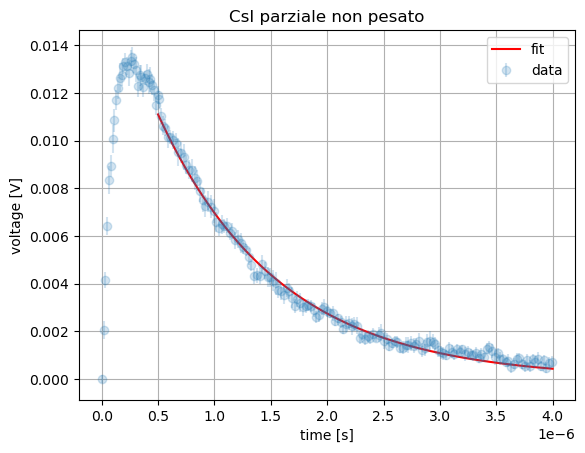

In [10]:
#fit CsI parziale non pesato

ls = LeastSquares(time, volt, err_volt, CsI_part)

#maschere
t_low=0.5e-6
t_up=4e-6
ls.mask = (time > t_low) & (time< t_up)
m2 = Minuit(ls, tau=2e-6, QR=100000)
m2.migrad()

m2.hesse()
display(m2)

ls.mask= None

# plot del fit
x = np.linspace(t_low, t_up, 3000)

plt.plot(x, CsI_part(x, m2.values[0], m2.values[1]), label='fit', color='red')
plt.errorbar(time,volt, err_volt, fmt='o', label='data', alpha=0.2)
plt.xlabel('time [s]')
plt.ylabel('voltage [V]')
plt.title('CsI parziale non pesato')
plt.grid()
plt.legend()
plt.show()


